# Qiskit - Getting Started

Here are a bunch of examples of how to utilize qiskit and visualize the results

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_state_city
from qiskit.tools.visualization import plot_bloch_vector

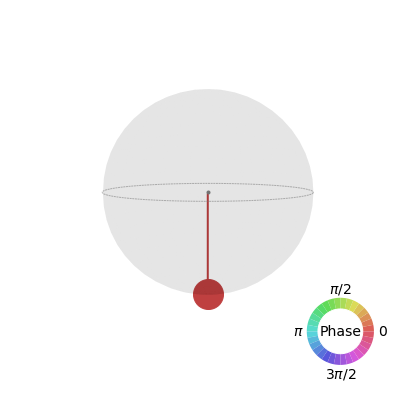

In [3]:
from qiskit.visualization import plot_state_qsphere
%matplotlib inline

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend).result()
plot_state_qsphere(job.get_statevector(qc))

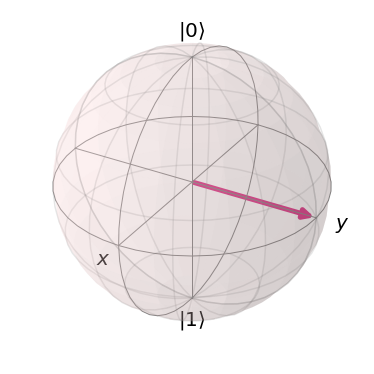

In [4]:
plot_bloch_vector([0,1,0])

In [5]:
def test00():
    q = QuantumRegister(1)
    c = ClassicalRegister(1)

    qc = QuantumCircuit(q,c)
    qc.measure(q,c)

    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc,backend,shots=1024)
    print(job.result())    
    counts = job.result().get_counts(qc)
    plot_histogram(job.result().get_counts(qc))
    return qc, counts

In [6]:
qc, counts = test00()

Result(backend_name='qasm_simulator', backend_version='2.0.0', header=Obj(backend_name='qasm_simulator', backend_version='2.0.0'), job_id='a6d4d794-db33-4874-bba1-cff6f65fa0b3', qobj_id='6b89bb2d-1b0d-4bc4-8a4d-9b179d110ce7', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=1024)), header=Obj(clbit_labels=[['c0', 0]], creg_sizes=[['c0', 1]], memory_slots=1, n_qubits=1, name='circuit2', qreg_sizes=[['q0', 1]], qubit_labels=[['q0', 0]]), meas_level=2, name='circuit2', seed_simulator=70968780, shots=1024, status='DONE', success=True, time_taken=0.003191232681274414)], status='COMPLETED', success=True, time_taken=0.0033066272735595703)


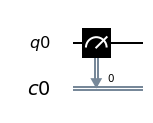

In [7]:
qc.draw(output='mpl')

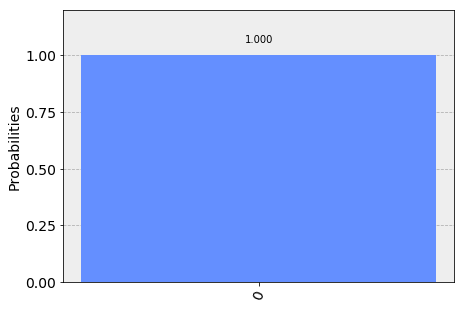

In [8]:
plot_histogram(counts)

In [9]:
def test01():
    from qiskit import Aer
    from qiskit.aqua.components.oracles import LogicalExpressionOracle
    from qiskit.aqua.algorithms import Grover

    sat_cnf = """
    c Example DIMACS 3-sat
    p cnf 3 5
    -1 -2 -3 0
    1 -2 3 0
    1 2 -3 0
    1 -2 -3 0
    -1 2 3 0
    """

    backend = Aer.get_backend('qasm_simulator')
    oracle = LogicalExpressionOracle(sat_cnf)
    algorithm = Grover(oracle)
    result = algorithm.run(backend)
    print(result)
    return result


In [10]:
res01 = test01()
# from collections import namedtuple
# res = namedtuple('res', result.keys())(**result)
# plot_state_city(res['measurement'])


{'circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fd4e8574e10>, 'measurement': {'000': 277, '011': 280, '001': 33, '100': 35, '110': 34, '101': 281, '010': 42, '111': 42}, 'top_measurement': '101', 'result': [1, -2, 3], 'oracle_evaluation': True}


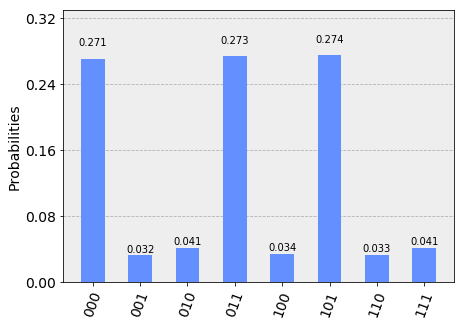

In [11]:
plot_histogram(res01['measurement'])

In [12]:
def test02():
    from qiskit import Aer

    circ = QuantumCircuit(3)
    circ.h(0)
    circ.cx(0,1)
    circ.cx(0,2)
#     print(circ)

    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    result = job.result()
    outputstate = result.get_statevector(circ, decimals=3)
#     print(outputstate)

    backend = Aer.get_backend('unitary_simulator')
    job = execute(circ, backend)
    result = job.result()
    unitary = result.get_unitary(circ, decimals=3)
    return circ, outputstate, result, unitary
    
    

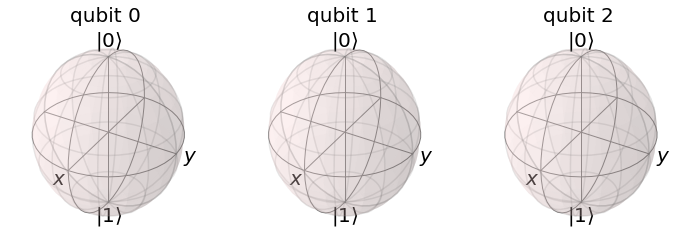

In [13]:
circ, outputstate, result, unitary = test02()
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(outputstate)


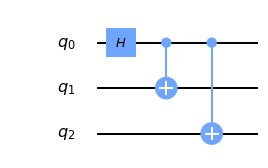

In [14]:
circ.draw(output='mpl')

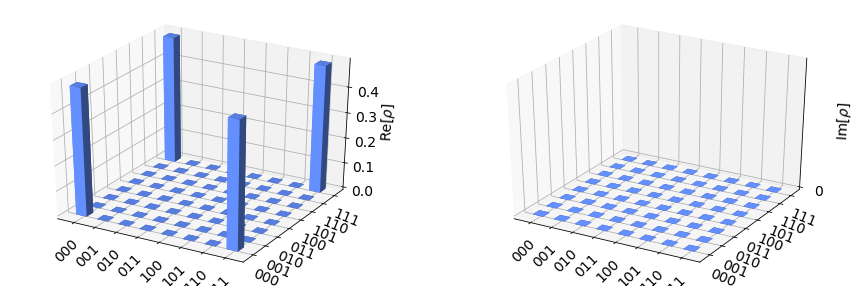

In [15]:
plot_state_city(outputstate)

In [16]:
result

Result(backend_name='unitary_simulator', backend_version='0.3.2', date=datetime.datetime(2020, 6, 11, 19, 17, 18, 299554), header=Obj(backend_name='unitary_simulator', backend_version='0.3.2'), job_id='fd95426e-10a6-4ba2-a4ed-29d184233c9e', metadata={'max_memory_mb': 3928, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.000120143}, qobj_id='4d37a7c4-551a-4aab-b743-510587734c86', results=[ExperimentResult(data=ExperimentResultData(unitary=[[(0.7071067811865476+0j), (0.7071067811865475+0j), 0j, 0j, 0j, 0j, 0j, 0j], [0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865475+0j), (-0.7071067811865476+0j)], [0j, 0j, (0.7071067811865476+0j), (0.7071067811865475+0j), 0j, 0j, 0j, 0j], [0j, 0j, 0j, 0j, (0.7071067811865475+0j), (-0.7071067811865476+0j), 0j, 0j], [0j, 0j, 0j, 0j, (0.7071067811865476+0j), (0.7071067811865475+0j), 0j, 0j], [0j, 0j, (0.7071067811865475+0j), (-0.7071067811865476+0j), 0j, 0j, 0j, 0j], [0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), (0.7071067811865475+0j)], [(0.70

In [17]:
def test03():
    circ = QuantumCircuit(3)
    circ.h(0)
    circ.cx(0,1)
    circ.cx(0,2)

    meas = QuantumCircuit(3, 3)
    meas.barrier(range(3))
    meas.measure(range(3), range(3))
    qc = circ+meas

    #     backend_sim = Aer.get_backend('qasm_simulator')
    backend_sim = Aer.get_backend('statevector_simulator')

    job_sim = execute(qc, backend_sim, shots=1024)
    result_sim = job_sim.result()
    outputstate = result_sim.get_statevector(qc, decimals=3)

    counts = result_sim.get_counts(qc)
    return qc, outputstate, result_sim, counts



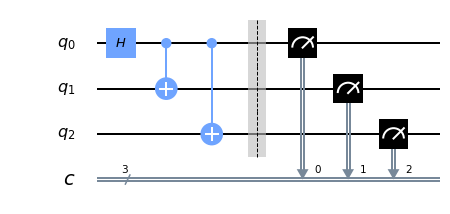

In [18]:
qc, outputstate, results, counts = test03()
qc.draw(output='mpl')

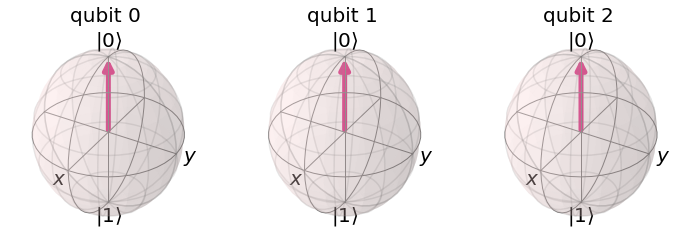

In [19]:
plot_bloch_multivector(outputstate)

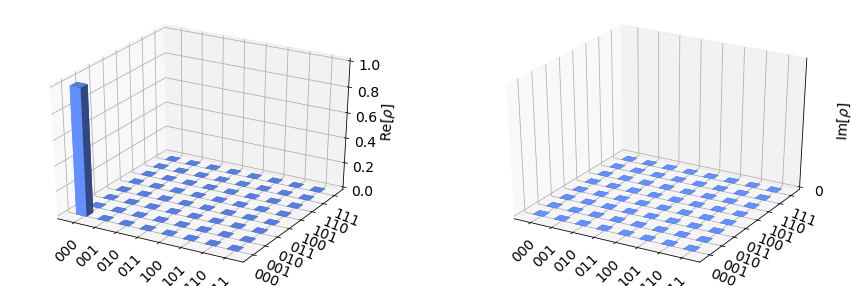

In [20]:
plot_state_city(outputstate)

In [21]:
def test04():
    qc = QuantumCircuit(12)

    for idx in range(5):
        qc.h(idx)
        qc.cx(idx, idx+5)

    qc.cx(1,7)
    qc.x(8)

    qc.cx(1,9)
    qc.x(7)

    qc.cx(1,11)

    qc.swap(6,11)
    qc.swap(6,9)
    qc.swap(6,10)

    qc.x(6)

    return qc



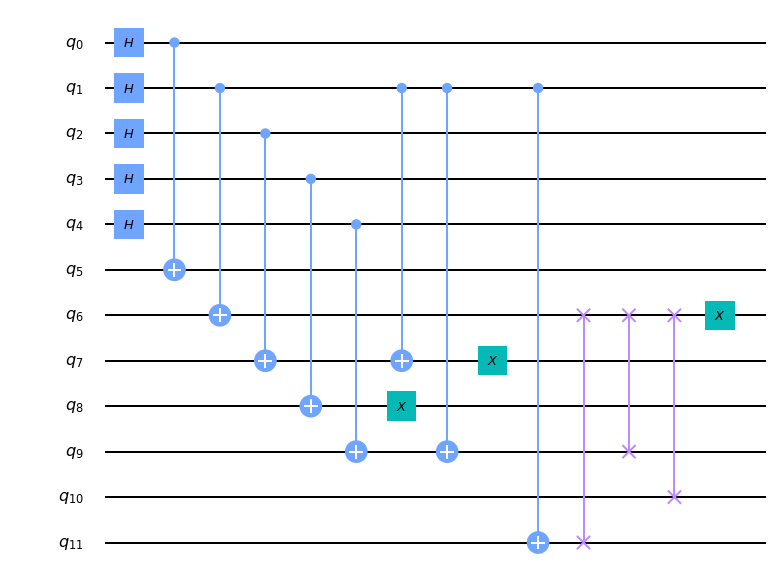

In [22]:
qc = test04()
qc.draw(output='mpl')

In [23]:
def test05():
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.cx(0,1)
    # circ.cx(0,2)

    meas = QuantumCircuit(2, 2)
    meas.barrier(range(2))
    meas.measure(range(2), range(2))

    qc = circ+meas

    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim, shots=1024)
    result_sim = job_sim.result()

    counts = result_sim.get_counts(qc)
    return qc, result_sim


Result(backend_name='qasm_simulator', backend_version='0.3.2', date=datetime.datetime(2020, 6, 11, 19, 17, 22, 471982), header=Obj(backend_name='qasm_simulator', backend_version='0.3.2'), job_id='f31a656c-987b-4bb7-8e9b-5e1aadb4324a', metadata={'max_memory_mb': 3928, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.002014082}, qobj_id='92868127-444e-4388-8537-45c328dc81a0', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=519, 0x3=505)), header=Obj(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], memory_slots=2, n_qubits=2, name='circuit21', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), meas_level=2, metadata={'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 4}, seed_simulator=3234782113, shots=1024, status='DONE', success=True, time_taken=0.001968589)], status='COMPLETED', success=True, time_taken=0.00616765022277832)


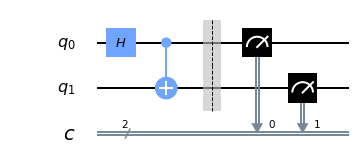

In [24]:
qc, results = test05()
print(results)
qc.draw(output='mpl')

In [25]:
def test06():
    import math
    pi = math.pi

    backend = BasicAer.get_backend('unitary_simulator')

    def runone(inp):
        q = QuantumRegister(2)
        qc = QuantumCircuit(q)

        mapped = {
            'cx': qc.cx,
            'cy': qc.cy,
            'cz': qc.cz,
            'ch': qc.ch,
            'swap': qc.swap
        }


        if inp == 'crz':
            # controlled rotation around Z-axis
            qc.crz(pi/2,q[0],q[1])

        elif inp == 'cu1':
            # controlled phase rotation
            qc.cu1(pi/2,q[0],q[1])

        elif inp == 'cu3':
            # controlled phase rotation
            qc.cu3(pi/2, pi/2, pi/2, q[0], q[1])

        elif mapped.get(inp) == None:
            print('error')
            return None

        else:
            mapped[inp](q[0],q[1])

        print(qc)
        job = execute(qc, backend)
        res = job.result().get_unitary(qc, decimals=3)
        print(res)
        return qc


    runone('ci')
    runone('cx')
    runone('cy')
    runone('cz')
    runone('ch')

    runone('crz')
    runone('cu1')
    runone('cu3')

    

In [26]:
test06()

error
              
q2_0: |0>──■──
         ┌─┴─┐
q2_1: |0>┤ X ├
         └───┘
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
              
q3_0: |0>──■──
         ┌─┴─┐
q3_1: |0>┤ Y ├
         └───┘
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]]
            
q4_0: |0>─■─
          │ 
q4_1: |0>─■─
            
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
              
q5_0: |0>──■──
         ┌─┴─┐
q5_1: |0>┤ H ├
         └───┘
[[ 1.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.707+0.j  0.   +0.j  0.707+0.j]
 [ 0.   +0.j  0.   +0.j  1.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.707+0.j  0.   +0.j -0.707+0.j]]
                     
q6_0: |0>─────■──────
         ┌────┴─────┐
q6_1: |0>┤ Rz(pi/2) ├
         └──────────┘
[[1.   +0.j   

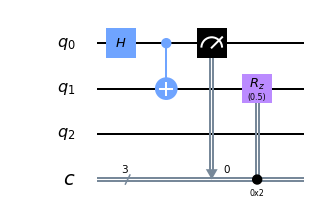

In [32]:
from qiskit.dagcircuit import DAGCircuit
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q, c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0], c[0])
circ.rz(0.5, q[1]).c_if(c, 2)
circ.draw(output='mpl')

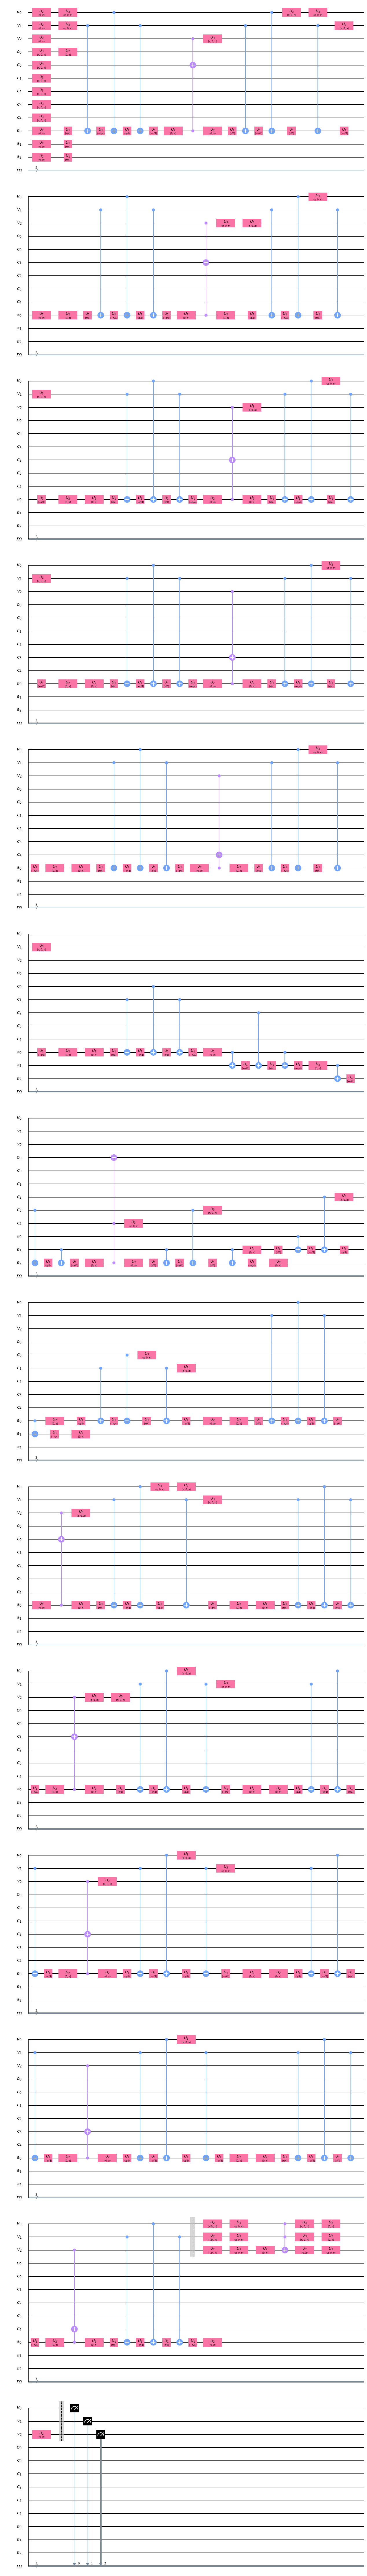

In [33]:
res01['circuit'].draw(output='mpl')
